In [711]:
import numpy as np
import  math
import nashpy as nash
import random

In [724]:
payOffLeft = [  [ [1.,0.], [0.,1]] ,     
                [ [0.,1.], [0.,1.]] ]

payOffRight = [  [ [0.,1.], [0.,1.]] ,     
                [ [0.,1.], [1.,0.]] ]
mats = [payOffLeft,payOffRight]
sda = [0,1]
brcr = [1,0]
#probabilities
p = [0.5,0.5]
rounds = 40
episodes = 20

In [725]:
def play_round():
    #select random matrix
    selected = random.choices(mats, p)
    p1_a1 = take_action(stage=1,selected=selected, informed_action=None,player_no=0)
    p2_a1 = take_action(stage=1,selected=None , informed_action=None,player_no=1)
    p1_a2 = take_action(stage=2,selected=selected, informed_action=None,player_no=0)
    p2_a2 = take_action(stage=2,selected=None , informed_action=p1_a1,player_no=1)

    reward_round1 = selected[0][p1_a1[0]][p2_a1]
    reward_round2 = selected[0][p1_a2][p2_a2[0]]
    total= reward_round1+reward_round2
    return reward_round1,reward_round2
    

In [726]:
def take_action(stage, selected, informed_action,player_no):
    if(stage==1 and player_no==0):
        if(selected[0]==payOffLeft):
            sda = [0,1]
            out = np.random.choice(sda, 1,p=[0.5,0.5])
            return out
        else:
            sda = [1,0]
            out = np.random.choice(sda, 1,p=[0.5,0.5])
            return out
    if(stage==1 and player_no==1):
        action= round(random.random())
        return action
    if(stage==2 and player_no==0):
        if(selected[0]==payOffLeft):
            sda = [0,1]
            return sda[0]
        else:
            sda=[0,1]
            return sda[1]
    if(stage==2 and player_no==1):
        if(informed_action==0):
            brcr = [1,0]
            out = random.choices(brcr,weights=(0.8,0.7),k=1)
            return out
        else:
            brcr = [0,1]
            out = random.choices(brcr,weights=(0.8,0.7),k=1)
            return out   


In [727]:

avgpayoff1=[]
avgpayoff2=[]
for j in range(200):
    payoff1=[]
    payoff2=[]
    sump1=0
    sump2=0
    for i in range(40):
        test=play_round()
    #     print (test)
        payoff1.append(test[1][0]+test[0][0])
        payoff2.append(test[0][1]+test[1][1])
        sump1+=test[1][0]+test[0][0]
        sump2+=test[0][1]+test[1][1]
    avgpayoff1.append(sump1/40)
    avgpayoff2.append(sump2/40)

In [728]:
np.mean(avgpayoff1)

0.756875

In [729]:
np.mean(avgpayoff2)

1.243125

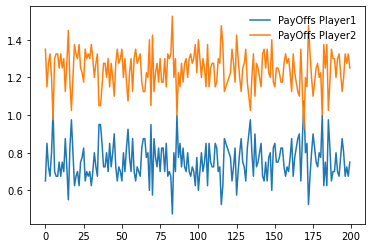

In [730]:
import matplotlib.pyplot as plt
plt.plot(avgpayoff1[:], label = "PayOffs Player1")
plt.plot(avgpayoff2[:], label = "PayOffs Player2")
plt.legend(frameon=False)
